In [1]:
!pip install pandas

In [2]:
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [7]:
from google.colab import files

In [13]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [14]:
df = pd.read_csv('/content/drive/My Drive/train.csv')
print(df.head)

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [15]:
df.drop('Loan_ID', axis=1, inplace=True)

In [16]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=[np.number]).columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-3338693094.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3338693094.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [17]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {acc:.4f}")

importances = clf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nFeature Importances:")
print(feat_imp)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

Confusion Matrix:
 [[18 25]
 [ 3 77]]
Accuracy: 0.7724

Feature Importances:
Credit_History       0.278821
ApplicantIncome      0.191836
LoanAmount           0.187927
CoapplicantIncome    0.106380
Loan_Amount_Term     0.052027
Property_Area        0.047555
Dependents           0.047044
Married              0.023887
Education            0.023194
Gender               0.020984
Self_Employed        0.020345
dtype: float64



Top 3 Features Influencing Loan Approval Decisions:
1. Credit_History: 0.2788
2. ApplicantIncome: 0.1918
3. LoanAmount: 0.1879

Recommendations for Improving Loan Approval Process:
- Use the top features (e.g., Credit_History, ApplicantIncome, LoanAmount) for quick pre-qualification.
- Automate approval for applicants with strong credit history and sufficient income/assets.
- Further investigate applications with borderline feature values for manual review.
- Regularly retrain the model with new data to adapt to changing applicant profiles.


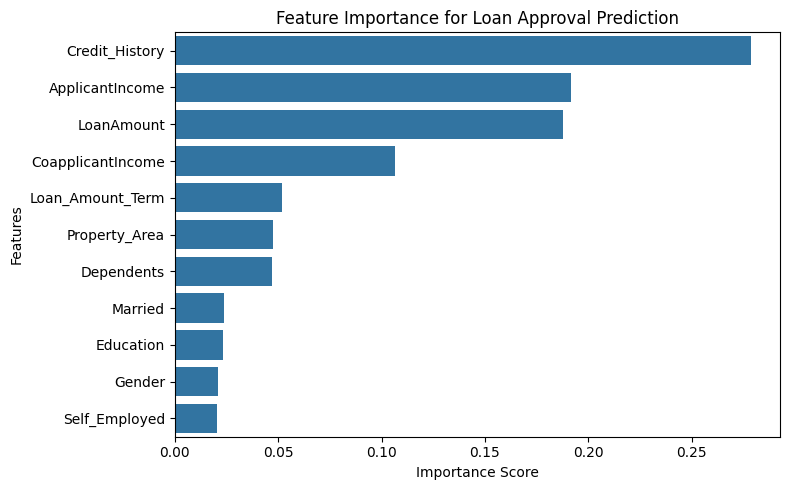

In [18]:
top3 = feat_imp.head(3)
print("\nTop 3 Features Influencing Loan Approval Decisions:")
for i, (feat, score) in enumerate(top3.items(), 1):
    print(f"{i}. {feat}: {score:.4f}")

print("\nRecommendations for Improving Loan Approval Process:")
print("- Use the top features (e.g., Credit_History, ApplicantIncome, LoanAmount) for quick pre-qualification.")
print("- Automate approval for applicants with strong credit history and sufficient income/assets.")
print("- Further investigate applications with borderline feature values for manual review.")
print("- Regularly retrain the model with new data to adapt to changing applicant profiles.")

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importance for Loan Approval Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
